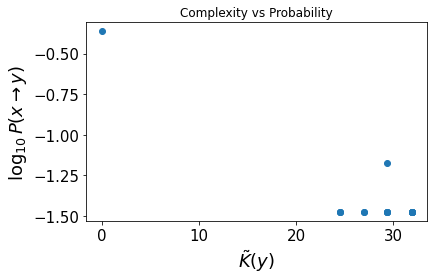

In [16]:
# For Umar
import numpy as np
#import LZ78Complexity
import KC # used for Lempel-Ziv complexity estimation
import matplotlib.pyplot as plt
import math as mt

file1 = open("Mapped_Input.txt","r")
file2 = open("Mapped_Output.txt","r")
file3 = open("Mapped_Output_prob.txt","r")

str_arr = file2.read()
str_arrlist = str_arr.split("\n")
str_arrlist.pop()

prob_arr = file3.read()
prob_arrlist = prob_arr.split("\n")
prob_arrlist.pop()

#print(str_arrlist)

#print(prob_arrlist)

# random SS
#BinaryString = ["01010","0101000","001011","11010"]
#print(BinaryString)
Z = []
for s in str_arrlist:
    k = KC.calc_KC(s)
    Z.append(np.round(k,1))

#print(Z)

upper_bound = []

for i in range(0,len(Z)):
    temp = 1/pow(2,float(Z[i]))
    upper_bound.append(temp)

# sum of probabilities    
nplist = np.array(prob_arrlist)
#print(nplist)

final_prob = []
for i in range(0, len(nplist)):
    q = nplist[i]
    qlog = mt.log10(float(q))
    final_prob.append(qlog)

#print(final_prob)

plt.figure()
#plt.plot(Z, upper_bound)
plt.scatter(Z,final_prob)
plt.title('Complexity vs Probability')
plt.ylabel(r'$\log_{10} P(x \rightarrow y)$',fontsize=18)
plt.xlabel(r'$\tilde{K}(y)$',fontsize=18)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.tight_layout()
plt.savefig('Complexity_probability.png')
plt.show()


In [2]:
# From Chico adapted for Python 3.X
# Code previously from Ben Frot
# Originally from XXX paper
import numpy as np

def KC_LZ(string):
    n=len(string)
    s = '0'+string
    c=1
    l=1
    i=0
    k=1
    k_max=1
    stop=0

    while stop==0:
        if s[i+k] != s[l+k]:
            if k>k_max:
                k_max=k

            i=i+1
            
            if i==l:
                c=c+1
                l=l+k_max

                if l+1>n:
                    stop=1

                else:
                    i=0
                    k=1
                    k_max=1
            else:
                k=1

        else:
            k=k+1

            if l+k>n:
                c=c+1
                stop=1



    # a la Lempel and Ziv (IEEE trans inf theory it-22, 75 (1976), 
    # h(n)=c(n)/b(n) where c(n) is the kolmogorov complexity
    # and h(n) is a normalised measure of complexity.
    complexity=c;

    #b=n*1.0/np.log2(n)
    #complexity=c/b;

    return complexity


def calc_KC(s):
    L = len(s)
    if s == '0'*L or s == '1'*L:
        return np.log2(L)
    else:
        return np.log2(L)*(KC_LZ(s)+KC_LZ(s[::-1]))/2.0
